In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [4]:
train_data_dir = '../dataset/cats_dogs/train/'
test_data_dir = '../dataset/cats_dogs/test/'

In [26]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE,
                                                        subset='training',
                                                        validation_split=0.1,
                                                        seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE,
                                                        subset='validation',
                                                        validation_split=0.1,
                                                        seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                       batch_size=BATCH_SIZE,
                                                       image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [10]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [13]:
for image_batch, label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


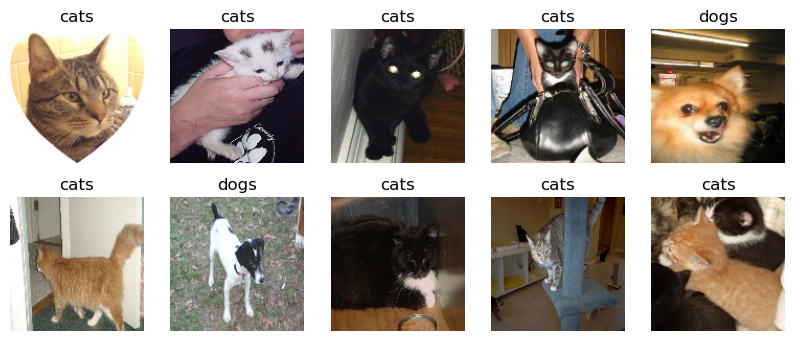

In [22]:
plt.figure(figsize=(10,4))
for image, label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [25]:
for image, label in train_data.take(1):
    print(image[0])

tf.Tensor(
[[[132.84949  124.84949  105.84949 ]
  [138.81873  130.81873  109.099976]
  [137.85413  130.11975  106.322876]
  ...
  [138.77051  118.77051   91.77051 ]
  [142.30322  122.30322   95.30322 ]
  [136.60156  119.60156   92.65259 ]]

 [[135.73584  124.73584  106.73584 ]
  [136.73914  125.739136 105.020386]
  [153.469    142.73462  119.937744]
  ...
  [140.1023   120.102295  93.102295]
  [160.31519  140.31519  113.315186]
  [161.22498  143.22498  122.08435 ]]

 [[138.547    125.547    108.547   ]
  [141.96057  129.31995  109.24182 ]
  [131.54907  119.54907   97.01782 ]
  ...
  [124.900635 104.900635  77.900635]
  [125.602295 105.602295  78.602295]
  [113.77344   94.77344   77.77344 ]]

 ...

 [[166.078    154.88269  132.49207 ]
  [161.44543  148.18726  124.085815]
  [173.72375  159.1925   133.04907 ]
  ...
  [203.5647   186.5647   166.5647  ]
  [188.75769  171.75769  152.00793 ]
  [186.14587  169.95056  147.5365  ]]

 [[162.38281  147.38281  118.38281 ]
  [166.3125   151.3125   1

In [28]:
train_data = train_data.map(lambda x, y: (x/255, y))
test_data = test_data.map(lambda x, y: (x/255,y))
validation_data = validation_data.map(lambda x,y: (x/255, y))

In [30]:
for image, label in train_data.take(1):
    print(image[0])

tf.Tensor(
[[[0.5209784  0.48960584 0.415096  ]
  [0.54438716 0.5130146  0.42784303]
  [0.5406044  0.5102735  0.41695246]
  ...
  [0.5441981  0.4657667  0.35988435]
  [0.5580518  0.4796205  0.37373814]
  [0.5356924  0.46902573 0.36334348]]

 [[0.53229743 0.48916015 0.41857192]
  [0.5362319  0.49309465 0.41184464]
  [0.6018392  0.5597436  0.4703441 ]
  ...
  [0.5494208  0.4709894  0.36510703]
  [0.628687   0.55025566 0.44437328]
  [0.6322548  0.56166655 0.47876215]]

 [[0.54332155 0.49234116 0.4256745 ]
  [0.5567081  0.50713706 0.4283993 ]
  [0.51587874 0.4688199  0.38046205]
  ...
  [0.4898064  0.41137505 0.3054927 ]
  [0.49255803 0.41412663 0.3082443 ]
  [0.44617033 0.37166053 0.30499387]]

 ...

 [[0.6512863  0.6073831  0.5195767 ]
  [0.63311934 0.5811265  0.48661104]
  [0.68126965 0.6242843  0.52176106]
  ...
  [0.79829293 0.7316263  0.6531949 ]
  [0.7402262  0.67355955 0.59610957]
  [0.7299838  0.6664728  0.5785745 ]]

 [[0.63679534 0.5779718  0.46424633]
  [0.6522059  0.59338236 0

In [34]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal', input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

In [35]:
model = tf.keras.models.Sequential([
    data_augmentation,
    
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])


In [37]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [38]:
history = model.fit(train_data,
                   epochs=20,
                   validation_data=validation_data)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 76s 309ms/step - accuracy: 0.5541 - loss: 0.7070 - val_accuracy: 0.5238 - val_loss: 0.6815
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 64s 283ms/step - accuracy: 0.6129 - loss: 0.6527 - val_accuracy: 0.5437 - val_loss: 0.9007
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 63s 280ms/step - accuracy: 0.6581 - loss: 0.6274 - val_accuracy: 0.6087 - val_loss: 0.7205
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 59s 263ms/step - accuracy: 0.6723 - loss: 0.5966 - val_accuracy: 0.7100 - val_loss: 0.5694
Epoch 5/20
107/225 ━━━━━━━━━━━━━━━━━━━━ 30s 256ms/step - accuracy: 0.6800 - loss: 0.5853

KeyboardInterrupt: 

In [39]:
tf.config.list_physical_devices('GPU')

[]